In [1]:
!pip install torchutils

In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
import torchutils as tu
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [3]:
!kaggle datasets download -d paultimothymooney/blood-cells

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/blood-cells
License(s): other
100% 108M/108M [00:00<00:00, 151MB/s] 
100% 108M/108M [00:00<00:00, 120MB/s]


In [4]:
!unzip blood-cells.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8864.jpeg  
  inflati

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [160]:
trnsfrms_train = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()
    ]
)

trnsfrms_valid = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()
    ]
)

In [161]:
train_dataset = torchvision.datasets.ImageFolder('/content/dataset2-master/dataset2-master/images/TRAIN', transform=trnsfrms_train)
valid_dataset = torchvision.datasets.ImageFolder('/content/dataset2-master/dataset2-master/images/TEST', transform=trnsfrms_valid)

In [162]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

In [163]:
# Переменные для хранения суммы и суммы квадратов
mean = 0.
std = 0.
nb_samples = 0

for data, _ in train_loader:
    batch_samples = data.size(0)  # количество изображений в батче
    data = data.view(batch_samples, data.size(1), -1)  # изменение формы на (batch_size, channels, H*W)
    mean += data.mean(2).sum(0)  # вычисляем среднее по каждому каналу
    std += data.std(2).sum(0)  # вычисляем стандартное отклонение по каждому каналу
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print(f"Mean: {mean}")
print(f"Std: {std}")

Mean: tensor([0.6787, 0.6414, 0.6606])
Std: tensor([0.2580, 0.2575, 0.2549])


In [164]:
trnsfrms_train_norm = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=mean.tolist(), std=std.tolist())
    ]
)

In [165]:
train_dataset_norm = torchvision.datasets.ImageFolder('/content/dataset2-master/dataset2-master/images/TRAIN', transform=trnsfrms_train_norm)
train_loader_norm = DataLoader(train_dataset_norm, batch_size=32, shuffle=True)

In [166]:
# Переменные для хранения суммы и суммы квадратов
mean_te = 0.
std_te = 0.
nb_samples_te = 0

for data, _ in valid_loader:
    batch_samples = data.size(0)  # количество изображений в батче
    data = data.view(batch_samples, data.size(1), -1)  # изменение формы на (batch_size, channels, H*W)
    mean_te += data.mean(2).sum(0)  # вычисляем среднее по каждому каналу
    std_te += data.std(2).sum(0)  # вычисляем стандартное отклонение по каждому каналу
    nb_samples_te += batch_samples

mean_te /= nb_samples_te
std_te /= nb_samples_te

print(f"Mean: {mean_te}")
print(f"Std: {std_te}")

Mean: tensor([0.6796, 0.6407, 0.6611])
Std: tensor([0.2572, 0.2562, 0.2543])


In [167]:
trnsfrms_valid_norm = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=mean_te.tolist(), std=std_te.tolist())
    ]
)

In [168]:
valid_dataset_norm = torchvision.datasets.ImageFolder('/content/dataset2-master/dataset2-master/images/TEST', transform=trnsfrms_valid_norm)
valid_loader_norm = DataLoader(valid_dataset_norm, batch_size=32, shuffle=True)

In [169]:
next(iter(train_dataset_norm))[0]

tensor([[[-2.6309, -2.6309, -2.6309,  ..., -2.6309, -2.6309, -2.6309],
         [-2.6309, -2.6309, -2.6309,  ..., -2.6309, -2.6309, -2.6309],
         [-2.6309, -2.6309, -2.6309,  ..., -2.6309, -2.6309, -2.6309],
         ...,
         [ 0.1052,  0.1356,  0.1660,  ..., -2.6309, -2.6309, -2.6309],
         [ 0.1052,  0.1508,  0.1812,  ..., -2.6309, -2.6309, -2.6309],
         [ 0.1204,  0.1508,  0.1964,  ..., -2.6309, -2.6309, -2.6309]],

        [[-2.4907, -2.4907, -2.4907,  ..., -2.4907, -2.4907, -2.4907],
         [-2.4907, -2.4907, -2.4907,  ..., -2.4907, -2.4907, -2.4907],
         [-2.4907, -2.4907, -2.4907,  ..., -2.4907, -2.4907, -2.4907],
         ...,
         [-0.0543, -0.0239, -0.0087,  ..., -2.4907, -2.4907, -2.4907],
         [-0.0239,  0.0066,  0.0523,  ..., -2.4907, -2.4907, -2.4907],
         [-0.0239,  0.0218,  0.0827,  ..., -2.4907, -2.4907, -2.4907]],

        [[-2.5919, -2.5919, -2.5919,  ..., -2.5919, -2.5919, -2.5919],
         [-2.5919, -2.5919, -2.5919,  ..., -2

In [211]:
model = torch.hub.load("pytorch/vision:main", "resnet18", pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [212]:
num_in_feat = model.fc.in_features
model.fc = nn.Linear(num_in_feat, 4)

In [213]:
for param in model.parameters():
    param.requires_grad = False

# Размораживаем последние несколько слоев (например, блоки 4 и 5)
for param in model.layer2.parameters():
    param.requires_grad = True
for param in model.layer3.parameters():
    param.requires_grad = True
for param in model.layer4.parameters():
    param.requires_grad = True
for param in model.fc.parameters():  # последний полностью связанный слой
    param.requires_grad = True

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [214]:
tu.get_model_summary(model, torch.randn(32, 3, 224, 224, device=device))

Layer                                       Kernel              Output          Params             FLOPs
0_conv1                                   [3, 64, 7, 7]   [32, 64, 112, 112]       9,408   3,776,446,464
1_bn1                                              [64]   [32, 64, 112, 112]         128     102,760,448
2_relu                                                -   [32, 64, 112, 112]           0               0
3_maxpool                                             -     [32, 64, 56, 56]           0               0
4_layer1.0.Conv2d_conv1                  [64, 64, 3, 3]     [32, 64, 56, 56]      36,864   3,699,376,128
5_layer1.0.BatchNorm2d_bn1                         [64]     [32, 64, 56, 56]         128      25,690,112
6_layer1.0.ReLU_relu                                  -     [32, 64, 56, 56]           0               0
7_layer1.0.Conv2d_conv2                  [64, 64, 3, 3]     [32, 64, 56, 56]      36,864   3,699,376,128
8_layer1.0.BatchNorm2d_bn2                         [64]

In [215]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.000002)
criterion = torch.nn.CrossEntropyLoss()
# lr=0.00002, 1 epoch
# lr=0.00001, 1 epoch
# lr=0.000001, 4 epoch

In [216]:
# зададим функцию рисования графиков
def plot_history(history, grid=True):
    fig, ax = plt.subplots(1,2, figsize=(14,5))

    ax[0].plot(history['train_loss'], label='train loss')
    ax[0].plot(history['valid_loss'], label='valid loss')
    ax[0].set_title('Loss')
    ax[0].grid(grid)
    ax[0].set_ylim((0, max(history['train_loss'] + history['valid_loss'])+.1))
    ax[0].legend()

    ax[1].plot(history['train_metric'], label='train acc')
    ax[1].plot(history['valid_metric'], label='valid acc')
    ax[1].set_title('Accuracy')
    ax[1].grid(grid)
    ax[1].set_ylim((0, 1))
    ax[1].legend()

    plt.show()

In [217]:
def fit_model(epochs: int, model: nn.Module, optimizer: torch.optim.Optimizer, history=None) -> tuple[list, ...]:

    history = history or {
        'train_metric': [],
        'train_loss': [],
        'valid_metric': [],
        'valid_loss': [],
    }

    start_epoch = len(history['train_metric'])
    for epoch in range(start_epoch+1, start_epoch+epochs+1):
        print(f'{"-"*13} Epoch {epoch} {"-"*13}')

        model.train()
        batch_accs = []
        batch_losses = []
        for data, labels in train_loader_norm:

            data = data.to(device)
            labels = labels.to(device)

            y_pred = model(data)

            loss = criterion(y_pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(axis=1) == labels).cpu().numpy().mean())

        history['train_loss'].append(np.mean(batch_losses))
        history['train_metric'].append(np.mean(batch_accs))


        model.eval()

        batch_accs = []
        batch_losses = []
        for data, labels in valid_loader_norm:
            with torch.no_grad():
                y_pred = model(data.to(device))
            loss = criterion(y_pred, labels.to(device))
            batch_losses.append(loss.item())
            batch_accs.append((y_pred.cpu().argmax(axis=1) == labels.cpu()).numpy().mean())
        history['valid_metric'].append(np.mean(batch_accs))
        history['valid_loss'].append(np.mean(batch_losses))


        print(
            f'train: accuracy {history["train_metric"][-1]:.4f}, loss {history["train_loss"][-1]:.4f}\n'
            f'valid: accuracy {history["valid_metric"][-1]:.4f}, loss {history["valid_loss"][-1]:.4f}'
        )
        print(f'{"-"*35}')
        print()


    plot_history(history)


    return history

------------- Epoch 3 -------------
train: accuracy 0.8176, loss 0.6137
valid: accuracy 0.7860, loss 0.6627
-----------------------------------

------------- Epoch 4 -------------
train: accuracy 0.8854, loss 0.4247
valid: accuracy 0.8224, loss 0.5308
-----------------------------------



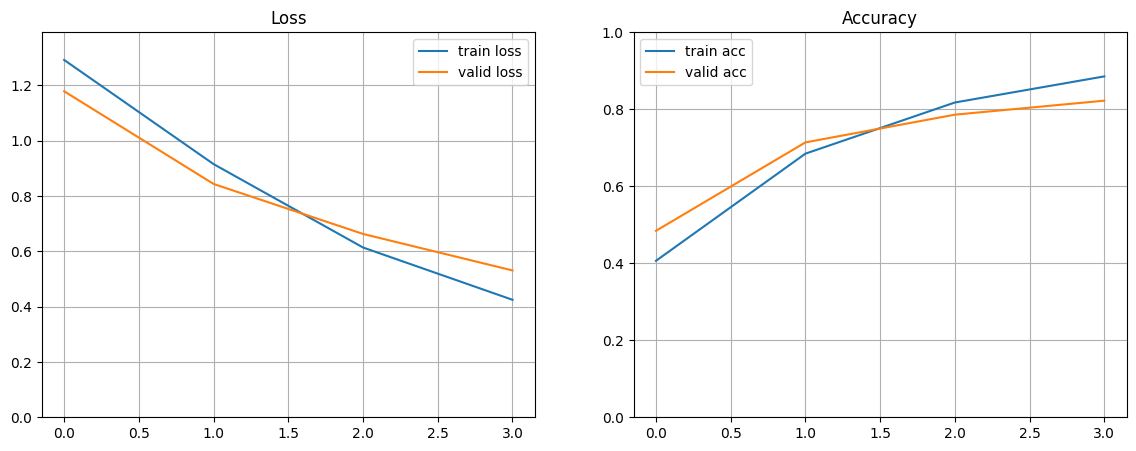

In [219]:
history = fit_model(2, model, optimizer, history)

In [232]:
torch.save(model.state_dict(), 'cells_resnet18.pth')

In [220]:
class_names = train_loader.dataset.classes
name_by_index = {class_names.index(i):i for i in class_names}
name_by_index

{0: 'EOSINOPHIL', 1: 'LYMPHOCYTE', 2: 'MONOCYTE', 3: 'NEUTROPHIL'}

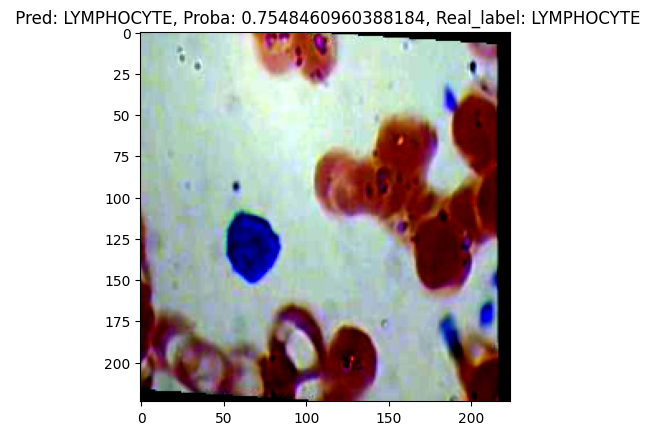

In [231]:
img, true_label = valid_dataset_norm[951]
model.to(device)
model.eval()
plt.imshow(torch.permute(img, (1, 2, 0)))
plt.title(f' Pred: {name_by_index[model(img.to(device).unsqueeze(0)).argmax().item()]}, Proba: {model(img.to(device).unsqueeze(0)).softmax(dim=1).max()}, Real_label: {name_by_index[true_label]}');